In [1]:
import pandas as pd
import altair as alt

alt.themes.enable('opaque')

ThemeRegistry.enable('opaque')

In [2]:
position = 'QB'
week = '1'
PATH = 'data/week' + week + '/' + position + '/'

In [4]:
df = pd.read_csv(PATH + position + '.csv')
df.head()

,Player,Team,Games,PassingCompletions,PassingAttempts,PassingYards,PassingTD,Interceptions,RushingAttempts,RushingYards,RushingTD,FantasyPoints,FantasyPointsPerGame
0,Lamar Jackson,BAL,1,17,20,324,5,0,3,6,0,33.6,33.6
1,Dak Prescott,DAL,1,25,32,405,4,0,4,12,0,33.4,33.4
2,Deshaun Watson,HOU,1,20,30,268,3,1,4,40,1,32.7,32.7
3,Matthew Stafford,DET,1,27,45,385,3,0,3,22,0,29.6,29.6
4,Patrick Mahomes,KC,1,25,33,378,3,0,1,2,0,27.3,27.3


In [7]:
df.columns

Index(['Player', 'Team', 'Games', 'PassingCompletions', 'PassingAttempts',
       'PassingYards', 'PassingTD', 'Interceptions', 'RushingAttempts',
       'RushingYards', 'RushingTD', 'FantasyPoints', 'FantasyPointsPerGame'],
      dtype='object')

In [141]:
data = df[['Player', 'Team', 'PassingCompletions', 'PassingAttempts',
       'PassingYards', 'PassingTD', 'Interceptions', 'RushingAttempts',
       'RushingYards', 'RushingTD', 'FantasyPoints']].copy()

In [9]:
# Create sorted list of teams in dataframe
# Data is defined below, above charts
teams = sorted((data['Team'].unique()))
teams[:5]

['ARI', 'ATL', 'BAL', 'BUF', 'CAR']

In [10]:
# Create list of all 32 teams
all_teams = ['ARI', 'ATL', 'BAL', 'BUF',
             'CAR', 'CHI', 'CIN', 'CLE',
             'DAL', 'DEN', 'DET', 'GB',
             'HOU', 'IND', 'JAC', 'KC', 
             'LAC', 'LAR', 'MIA', 'MIN', 
             'NE', 'NO', 'NYG', 'NYJ', 
             'OAK', 'PHI', 'PIT', 'SEA',
             'SF', 'TB', 'TEN', 'WAS']

In [11]:
# Sometimes a team can be missing, find which ones
[team for team in all_teams if team not in teams]

[]

In [12]:
# Create list of team colors, comment colors for missing teams
color_codes = [
    '#97233F', #ARI
    '#A71930', #ATL
    '#241773', #BAL
    '#00338D', #BUF
    '#0085CA', #CAR
    '#C83803', #CHI
    '#FB4F14', #CIN
    '#311D00', #CLE
    '#869397', #DAL
    '#FB4F14', #DEN
    '#0076B6', #DET
    '#203731', #GB
    '#03202F', #HOU
    '#002C5F', #IND
    '#006778', #JAC
    '#E31837', #KC
    '#FFC20E', #LAC
    '#866D4B', #LAR
    '#FC4C02', #MIA
    '#4F2683', #MIN
    '#002244', #NE
    '#D3BC8D', #NO
    '#0B2265', #NYG
    '#125740', #NYJ
    '#000000', #OAK
    '#004C54', #PHI
    '#FFB612', #PIT
    '#69BE28', #SEA
    '#AA0000', #SF
    '#D50A0A', #TB
    '#418FDE', #TEN
    '#773141' #WAS
]

In [144]:
data = data.loc[data['FantasyPoints'] > 0]

## Fantasy Points

In [20]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'FantasyPoints:Q',
        axis = alt.Axis(title = 'Fantasy Points')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'FantasyPoints',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Fantasy Points by Quarterbacks')

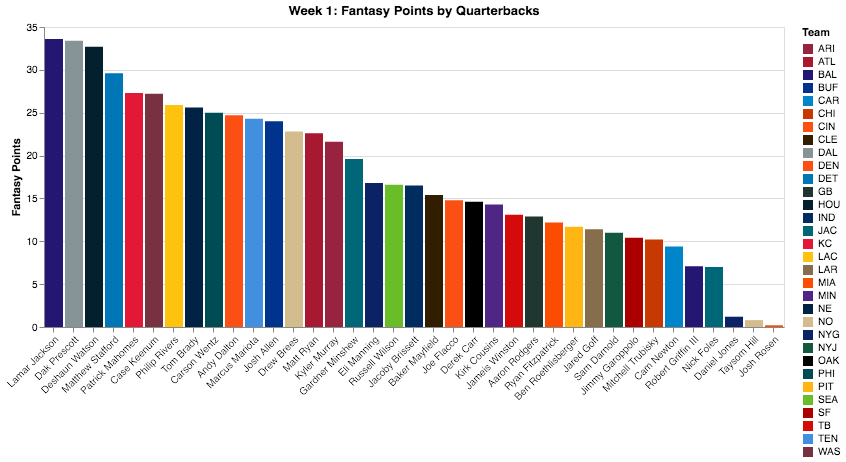

In [21]:
chart

In [22]:
chart.save(PATH + 'plots/QB_fantasypoints_color.png', scale_factor=3.0)

In [23]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'FantasyPoints:Q',
        axis = alt.Axis(title = 'Fantasy Points')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'FantasyPoints',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Fantasy Points by Quarterbacks')

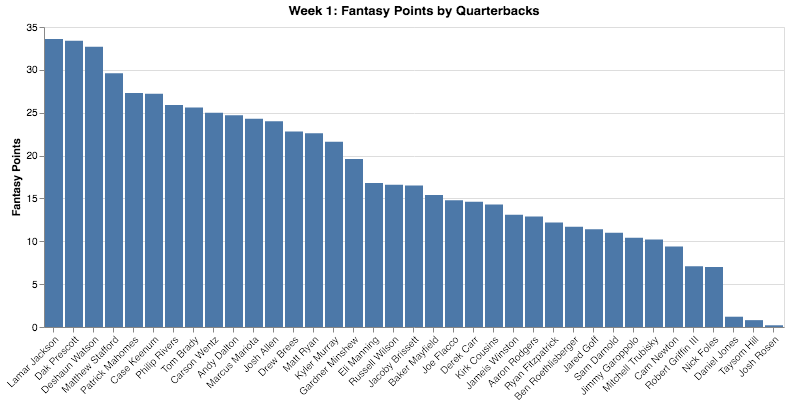

In [24]:
chart

In [25]:
chart.save(PATH + 'plots/QB_fantasypoints_plain.png', scale_factor=3.0)

## Passing Yards

In [29]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'PassingYards:Q',
        axis = alt.Axis(title = 'Passing Yards')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'PassingYards',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Passing Yards by Quarterbacks')

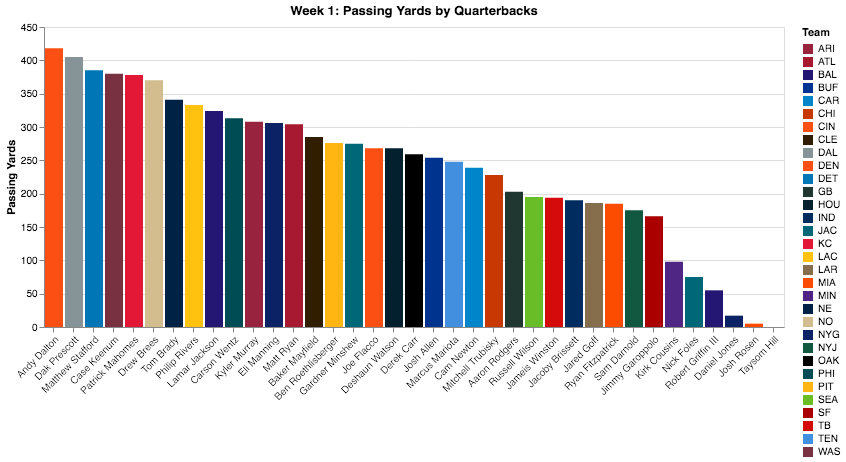

In [30]:
chart

In [31]:
chart.save(PATH + 'plots/QB_passingyards_color.png', scale_factor=3.0)

In [32]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'PassingYards:Q',
        axis = alt.Axis(title = 'Passing Yards')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'PassingYards',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Passing Yards by Quarterbacks')

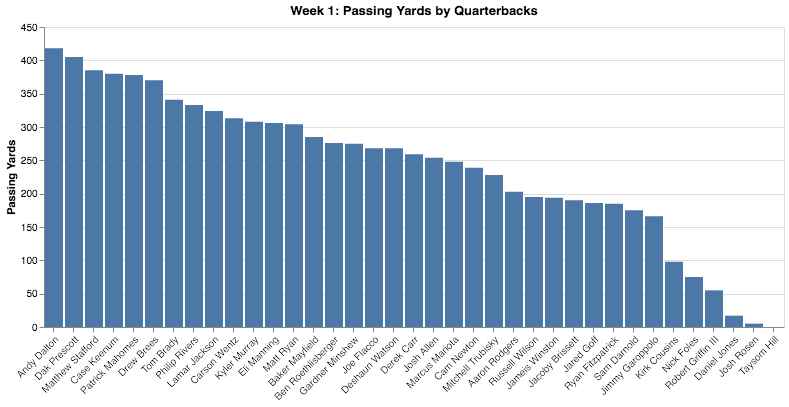

In [33]:
chart

In [34]:
chart.save(PATH + 'plots/QB_passingyards_plain.png', scale_factor=3.0)

## Passing Attempts

In [38]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'PassingAttempts:Q',
        axis = alt.Axis(title = 'Passing Attempts')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'PassingAttempts',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Passing Attempts by Quarterbacks')

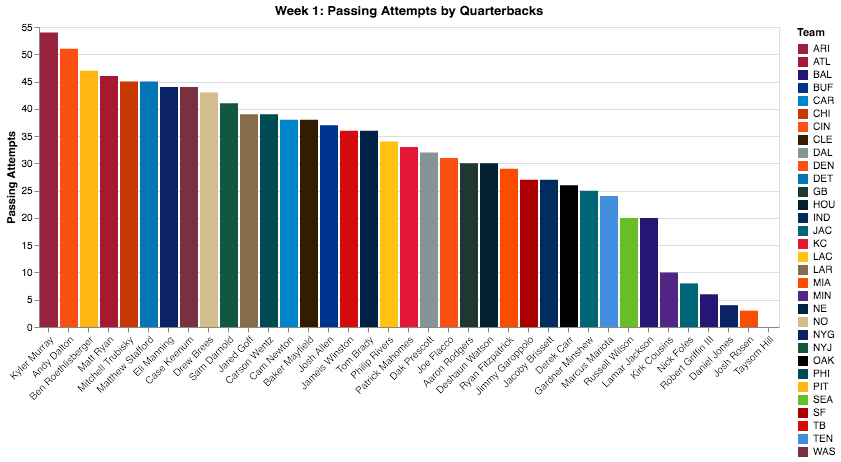

In [39]:
chart

In [40]:
chart.save(PATH + 'plots/QB_passingattempts_color.png', scale_factor=3.0)

In [41]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'PassingAttempts:Q',
        axis = alt.Axis(title = 'Passing Attempts')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'PassingAttempts',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Passing Attempts by Quarterbacks')

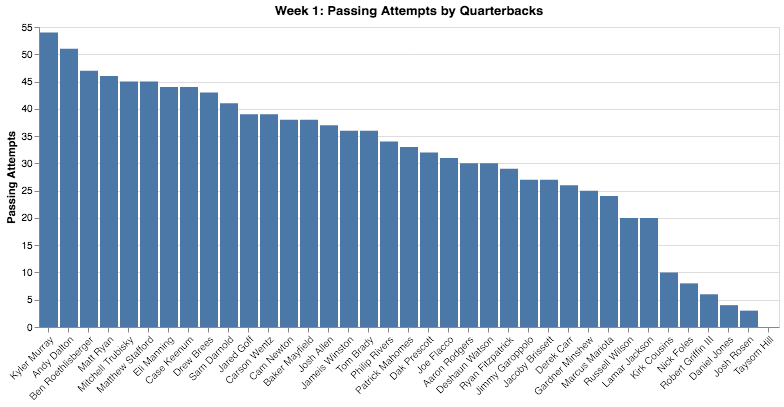

In [42]:
chart

In [43]:
chart.save(PATH + 'plots/QB_passingattempts_plain.png', scale_factor=3.0)

## Passing Completions

In [44]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'PassingCompletions:Q',
        axis = alt.Axis(title = 'Passing Completions')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'PassingCompletions',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Passing Completions by Quarterbacks')

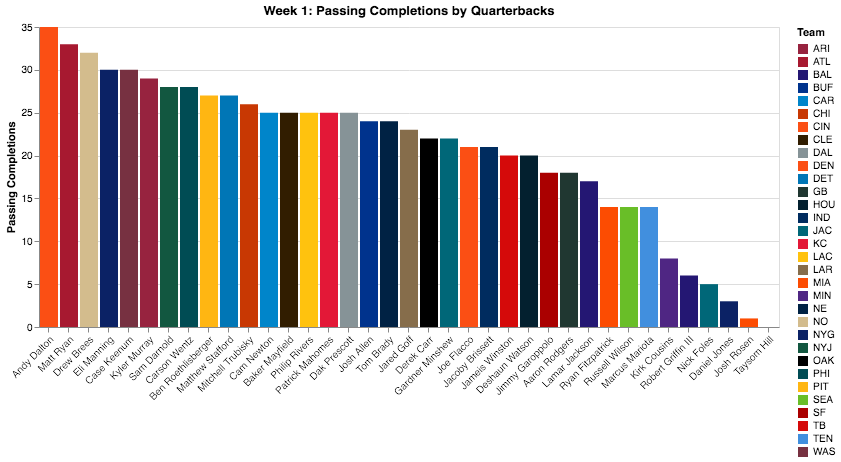

In [45]:
chart

In [46]:
chart.save(PATH + 'plots/QB_passingcompletions_color.png', scale_factor=3.0)

In [47]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'PassingCompletions:Q',
        axis = alt.Axis(title = 'Passing Completions')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'PassingCompletions',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Passing Completions by Quarterbacks')

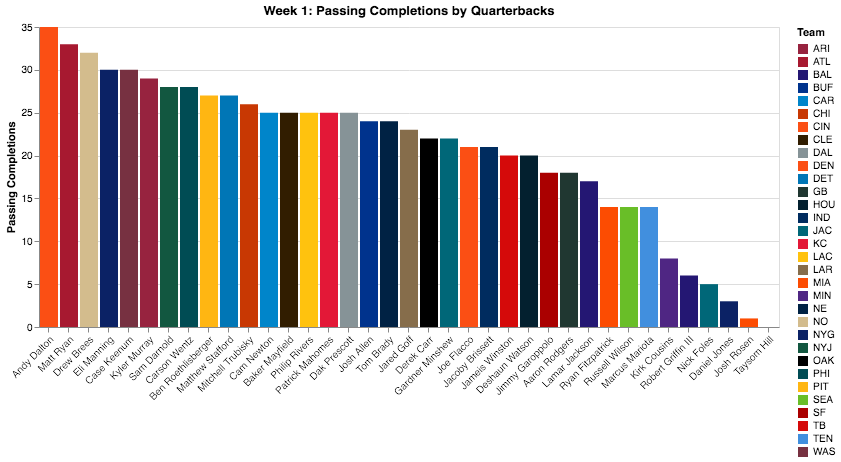

In [48]:
chart

In [49]:
chart.save(PATH + 'plots/QB_passingcompletions_plain.png', scale_factor=3.0)

## Completion Percentage

In [51]:
data['CompletionPercentage'] = data['PassingCompletions'] / data['PassingAttempts']

/Users/sarthak/Documents/FantasyFootballVisualizer2019/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'CompletionPercentage:Q', 
        axis=alt.Axis(
            format='.0%',
            title='Completion Percentage'
        )
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'CompletionPercentage',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Completion Percentage for Quarterbacks')

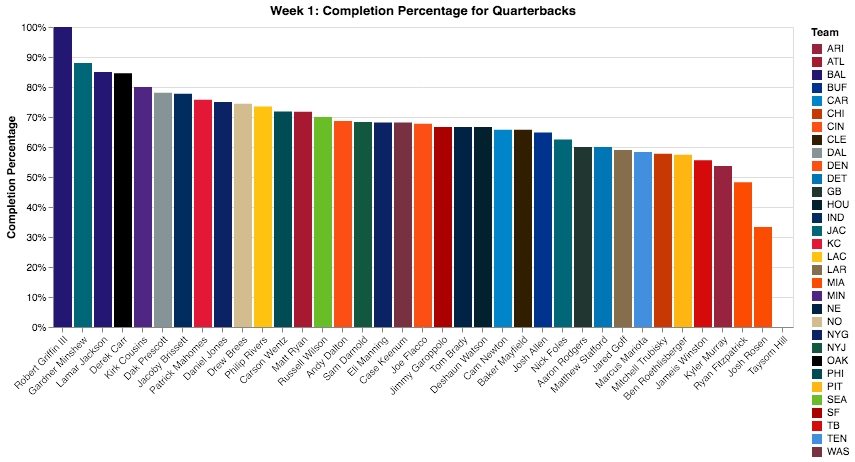

In [54]:
chart

In [55]:
chart.save(PATH + 'plots/QB_completionpercentage_color.png', scale_factor=3.0)

In [56]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'CompletionPercentage:Q', 
        axis=alt.Axis(
            format='.0%',
            title='Completion Percentage'
        )
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'CompletionPercentage',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Completion Percentage for Quarterbacks')

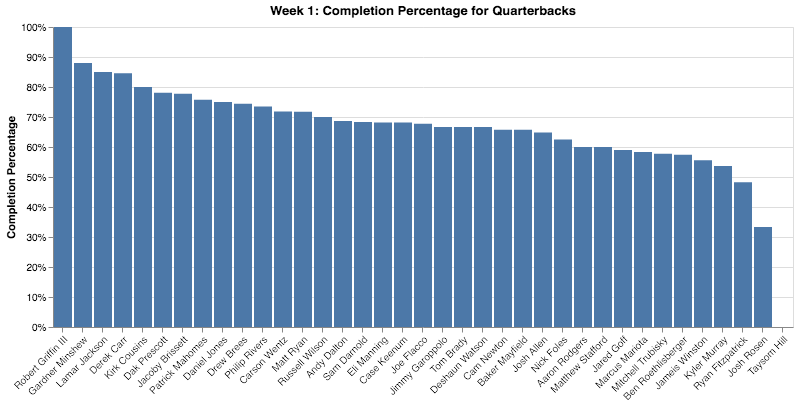

In [57]:
chart

In [58]:
chart.save(PATH + 'plots/QB_completionpercentage_plain.png', scale_factor=3.0)

## Passing Touchdowns

In [103]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'PassingTD:Q',
        axis = alt.Axis(title = 'Passing Touchdowns',
                       tickCount=5)
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'PassingTD',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Passing Touchdowns by Quarterbacks')

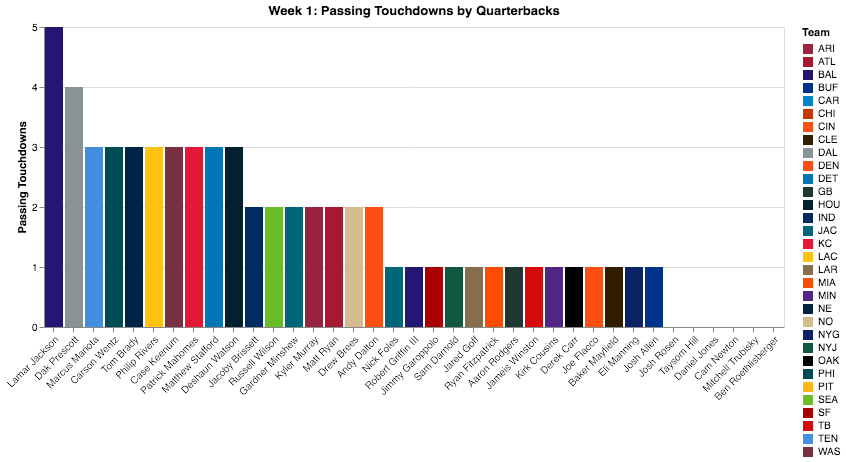

In [104]:
chart

In [105]:
chart.save(PATH + 'plots/QB_passingtd_color.png', scale_factor=3.0)

In [114]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'PassingTD:Q',
        axis = alt.Axis(title = 'Passing Touchdowns',
                       tickMinStep=1)
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'PassingTD',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Passing Touchdowns by Quarterbacks')

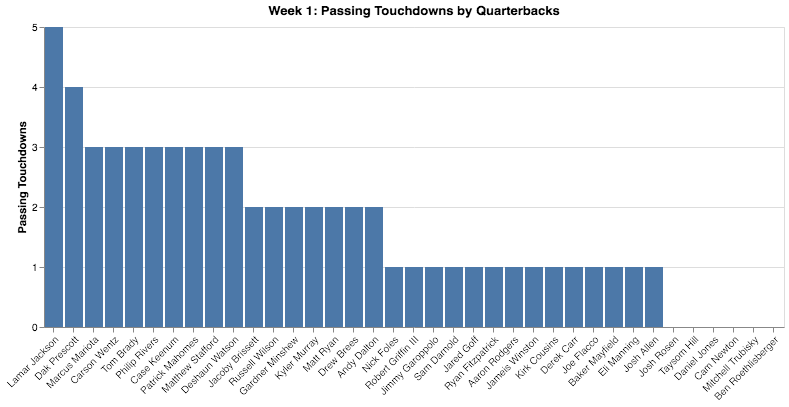

In [115]:
chart

In [108]:
chart.save(PATH + 'plots/QB_passingtd_plain.png', scale_factor=3.0)

## Interceptions

In [116]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'Interceptions:Q',
        axis = alt.Axis(title = 'Interceptions',
                       tickMinStep = 1)
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'Interceptions',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Interceptions by Quarterbacks')

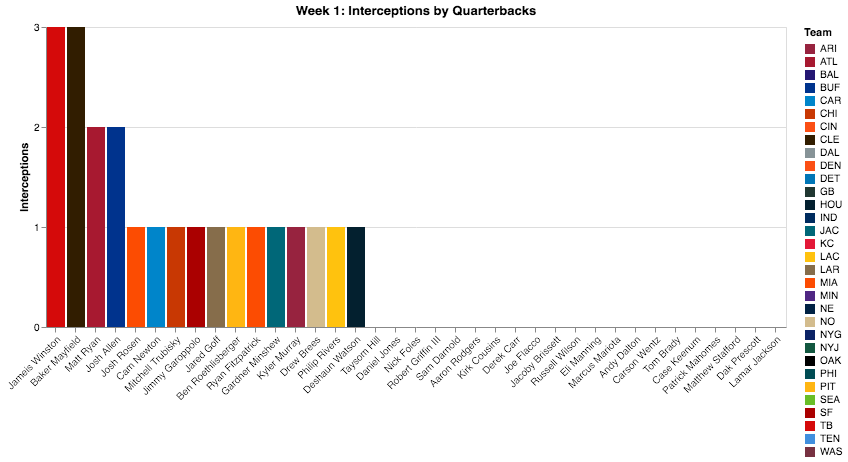

In [117]:
chart

In [118]:
chart.save(PATH + 'plots/QB_interceptions_color.png', scale_factor=3.0)

In [119]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'Interceptions:Q',
        axis = alt.Axis(title = 'Interceptions',
                       tickMinStep = 1)
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'Interceptions',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Interceptions by Quarterbacks')

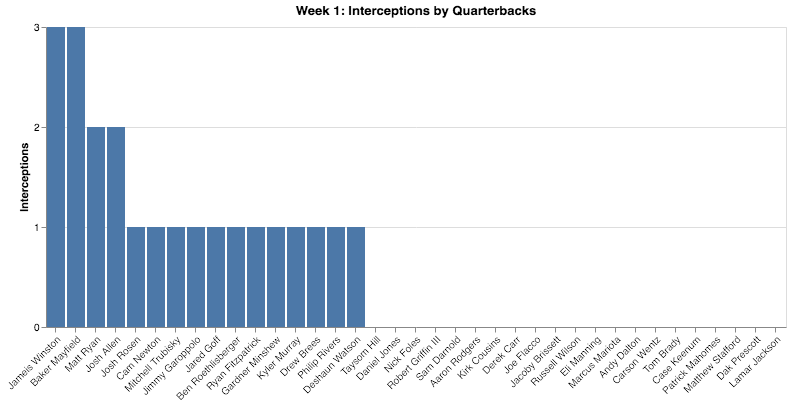

In [120]:
chart

In [121]:
chart.save(PATH + 'plots/QB_interceptions_plain.png', scale_factor=3.0)

## Rushing Attempts
       

In [122]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'RushingAttempts:Q',
        axis = alt.Axis(title = 'Rushing Attempts',
                       tickMinStep = 1)
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'RushingAttempts',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Rushing Attempts by Quarterbacks')

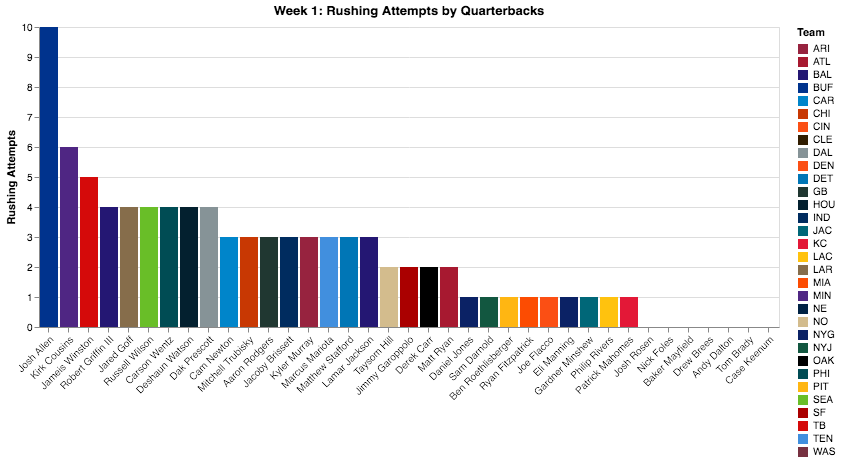

In [123]:
chart

In [124]:
chart.save(PATH + 'plots/QB_rushingattempts_color.png', scale_factor=3.0)

In [125]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'RushingAttempts:Q',
        axis = alt.Axis(title = 'Rushing Attempts',
                       tickMinStep = 1)
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'RushingAttempts',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Rushing Attempts by Quarterbacks')

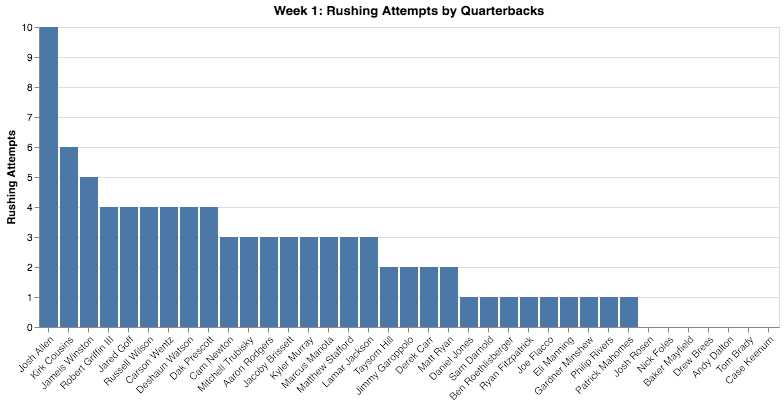

In [126]:
chart

In [127]:
chart.save(PATH + 'plots/QB_rushingattempts_plain.png', scale_factor=3.0)

## Yards Per Attempt

In [131]:
data['YPA'] = data['PassingYards'] / data['PassingAttempts']

/Users/sarthak/Documents/FantasyFootballVisualizer2019/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [132]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'YPA:Q',
        axis = alt.Axis(title = 'Yards Per Attempt')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'YPA',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Yards Per Attempt by Quarterbacks')

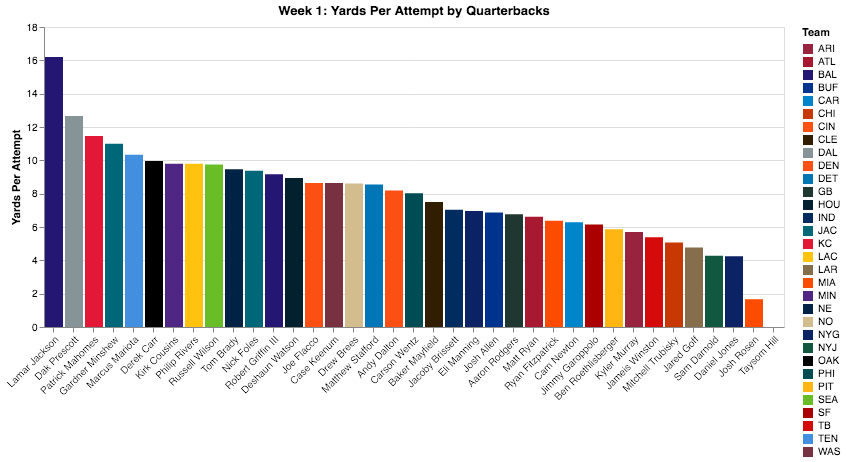

In [133]:
chart

In [134]:
chart.save(PATH + 'plots/QB_ypa_color.png', scale_factor=3.0)

In [135]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'YPA:Q',
        axis = alt.Axis(title = 'Yards Per Attempt')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'YPA',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Yards Per Attempt by Quarterbacks')

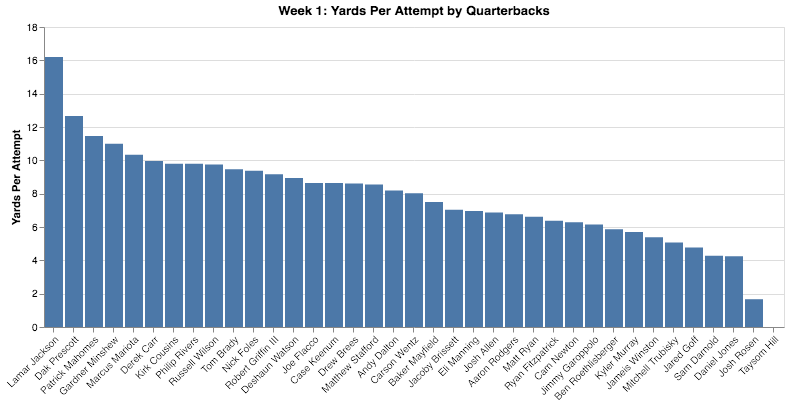

In [136]:
chart

In [137]:
chart.save(PATH + 'plots/QB_ypa_plain.png', scale_factor=3.0)

## Rushing Yards

In [145]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'RushingYards:Q',
        axis = alt.Axis(title = 'Rushing Yards')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'RushingYards',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Rushing Yards by Quarterbacks')

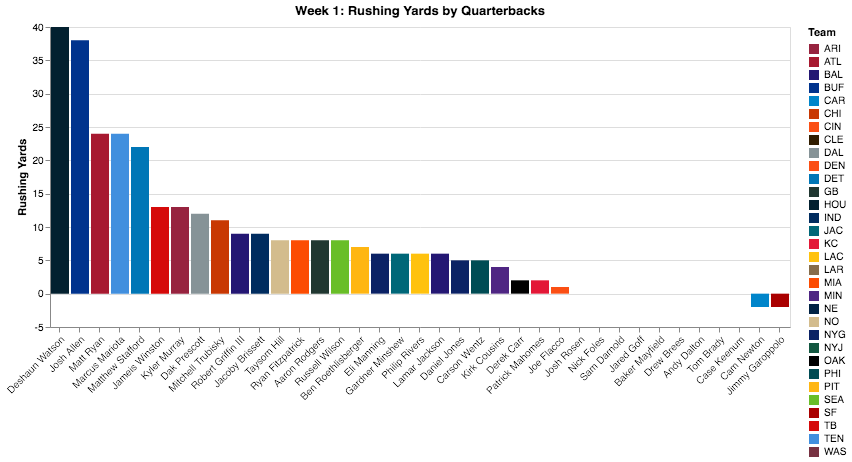

In [146]:
chart

In [147]:
chart.save(PATH + 'plots/QB_rushingyards_color.png', scale_factor=3.0)

In [148]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'RushingYards:Q',
        axis = alt.Axis(title = 'Rushing Yards')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'RushingYards',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Rushing Yards by Quarterbacks')

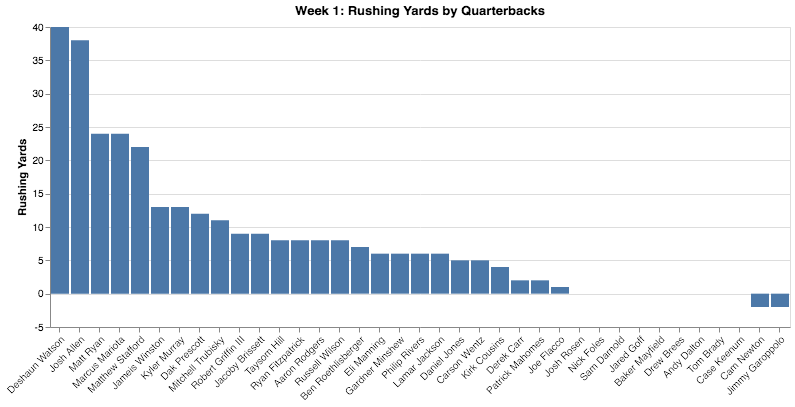

In [149]:
chart

In [150]:
chart.save(PATH + 'plots/QB_rushingyards_plain.png', scale_factor=3.0)